Organizacja wykresu. Co jest czym

Kostrukcja wykresu matplotlib składa się z kilku elementów

![image](dane/anatomy.png)

Prezentacja wybranych typów danych
* dane punktowe
* dane liniowe
* dane poligonowe
  
Nie mylić z typami danych

In [5]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
powiat = pd.read_csv("dane/pow.csv")
powiat.head()

,fid,powiat,woj,m,k,aprod,prod,pprod,malzenstwa,przyrost
0,1,złotoryjski,2,22059,22997,6451,31248,7357,4.6,-2.3
1,2,Legnica,2,48273,53719,13691,68317,19984,4.4,-2.3
2,3,jeleniogórski,2,31460,33711,8696,44540,11935,3.9,-4.4
3,4,górowski,2,17989,18402,5855,24457,6079,5.3,-0.7
4,5,oleśnicki,2,51929,54159,16488,71646,17954,4.7,0.3


## Podstawowe wykresy

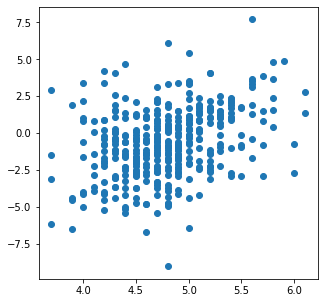

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(powiat.malzenstwa,powiat.przyrost)

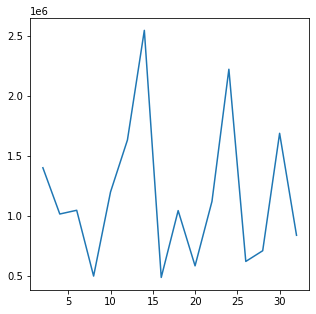

In [5]:
groups = powiat[["woj","m"]].groupby("woj").agg(sum)
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(groups.index,groups.m)

<BarContainer object of 16 artists>

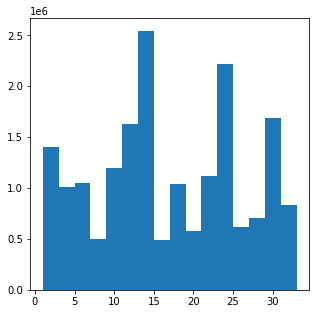

In [16]:
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(groups.index,groups.m,width=2)

([<matplotlib.patches.Wedge at 0x7f552e59c340>,
 [Text(0.9802262742284965, 0.49915573853469875, ''),
  Text(-1.0937511951671146, 0.11708254810392682, ''),
  Text(0.9215283094652083, -0.6006542889667864, '')])

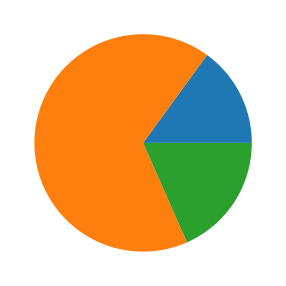

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
_ = ax.pie(powiat.sum(axis=0,numeric_only=True)[4:7])

## Tworzenie i modyfikacja symboli

(-9.835, 8.535)

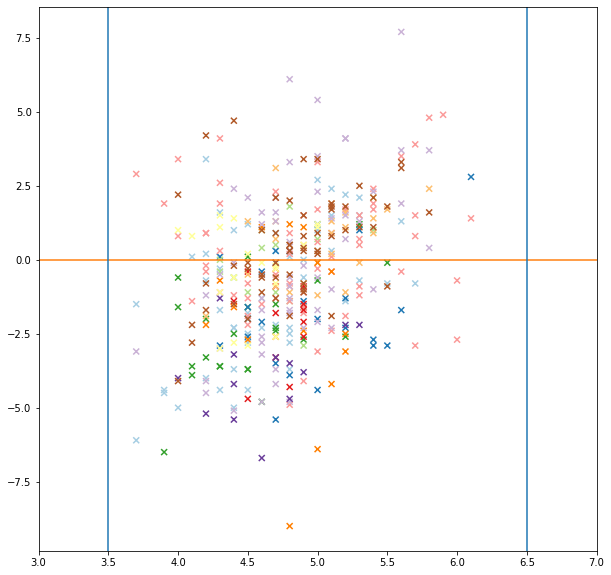

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(powiat.malzenstwa,powiat.przyrost,c=powiat.woj,cmap="Paired",marker="x")
ax.set_label("Małżeństwa")
ax.set_label("Przyrost")
ax.set_label("Małżeństwa")
ax.set_xlim(3,7)
#
ax.axhline(0,c="tab:orange")
min,max = ax.get_ylim()
ax.vlines([3.5,6.5],ymin=min,ymax=max)
ax.set_ylim(min,max)

## Formatowanie wykresu i tworzenie układów wykresów. Czym jest siatka wykresu?

In [8]:
columns = powiat.columns
columns

Index(['fid', 'powiat', 'woj', 'm', 'k', 'aprod', 'prod', 'pprod',
       'malzenstwa', 'przyrost'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x7f552e4ba760>,
 [Text(0.9521403188074309, 0.5508437285667179, ''),
  Text(-1.0999747329733867, -0.0074556569212076785, ''),
  Text(0.9558520462326601, -0.5443775029451867, '')])

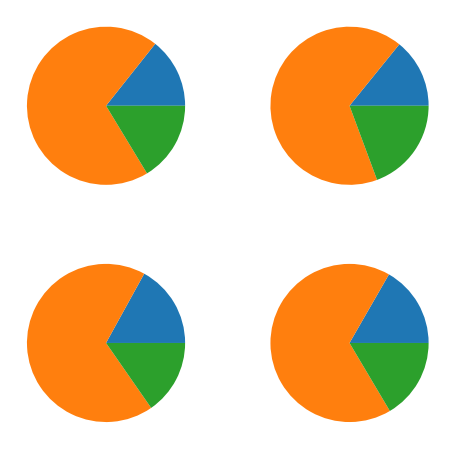

In [9]:
fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(8,8))
columns = powiat.columns
axes[0][0].pie(powiat.loc[0,columns[5:8]])
axes[0][1].pie(powiat.loc[65,columns[5:8]])
axes[1][0].pie(powiat.loc[36,columns[5:8]])
axes[1][1].pie(powiat.loc[131,columns[5:8]])


## Automatyzacja procesu formatowania danych - stosowanie zmiennych i pętli

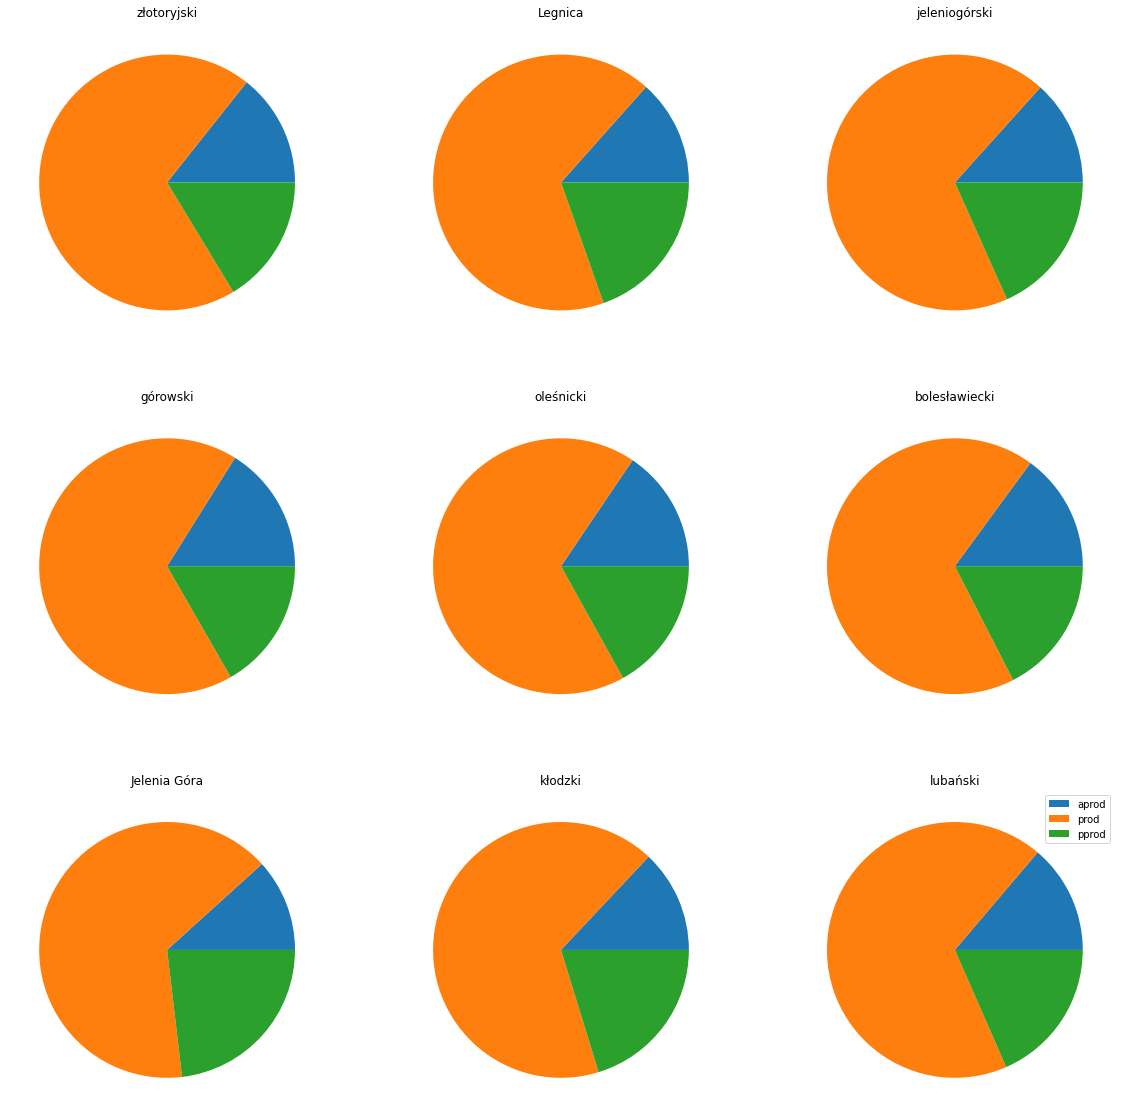

In [14]:
#fig, axes = plt.subplots(ncols=19,nrows=20,figsize=(20,20))
fig, axes = plt.subplots(ncols=3,nrows=3,figsize=(20,20))
for i, ax in enumerate(axes.flatten()):
    patches, _ = ax.pie(powiat.loc[i,columns[5:8]])
    _ = ax.set_title(powiat.powiat[i])
ax.legend(patches,columns[5:8]) # dlaczego poza pętlą?


## Seaborn i Pandas

<Axes: xlabel='malzenstwa', ylabel='przyrost'>

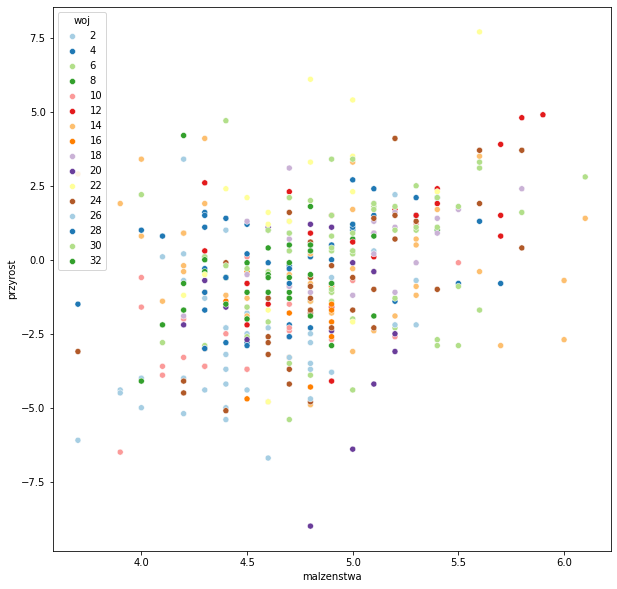

In [13]:
fig,ax = plt.subplots(figsize=(10,10))
sns.scatterplot(powiat,x="malzenstwa",y="przyrost",hue="woj",palette="Paired")

<Axes: xlabel='malzenstwa', ylabel='przyrost'>

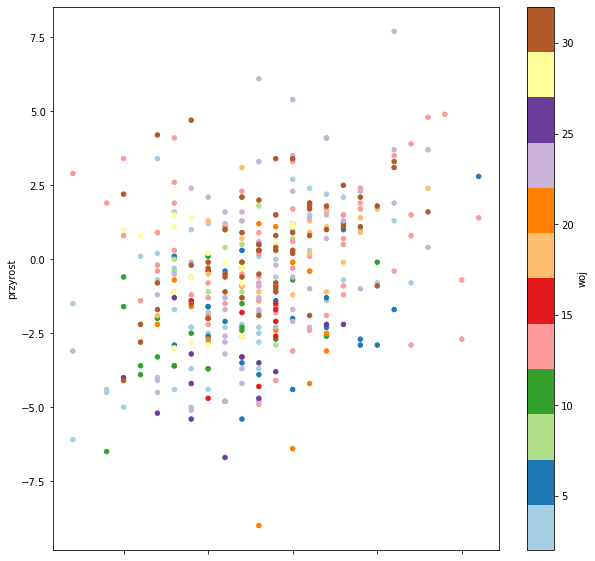

In [19]:
powiat.plot(x="malzenstwa",y="przyrost",kind="scatter",figsize=(10,10),c="woj",colormap="Paired")